In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

## Data preparation

In [437]:
data.head()

,CWRT_syth,HLI Entering CHW Temp
timestamp,,
2019-01-13 00:00:00,31.090000,NaN
2019-01-13 00:05:00,31.106000,NaN
2019-01-13 00:10:00,31.129999,10.6
2019-01-13 00:15:00,31.146000,NaN
2019-01-13 00:20:00,31.170000,NaN


#### - CWRT_syth: condenser water return tempreture
#### - HLI Entering CHW Temp: high level interface entering (return) chilled water tempreture

In [4]:
data = pd.read_excel('../data/Testcase_dataset-IBPEM.xlsx')
# Create timestamp from two columns
data['timestamp'] = pd.to_datetime({
    'year': data['Date'].str.split('-').str.get(0), 
    'month': data['Date'].str.split('-').str.get(1), 
    'day': data['Date'].str.split('-').str.get(2), 
    'hour':data['Time'].str.slice(0, 2), 
    'minute': data['Time'].str.slice(2,4)})

data = data.drop(columns=['Date', 'Time'])
data = data.set_index('timestamp')



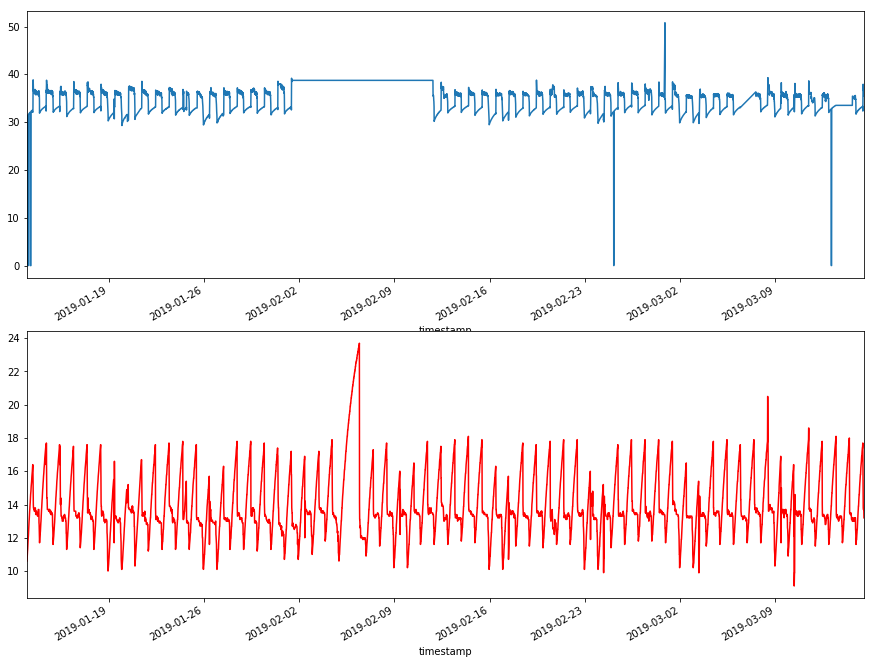

In [489]:
# Let's take only the CWRT_syth first
series1 = data['CWRT_syth'].dropna()
series2 = data['HLI Entering CHW Temp'].dropna()

fig, axes = plt.subplots(nrows=2, ncols=1)
series1.plot(ax=axes[0], figsize=[15,12])
series2.plot(ax=axes[1], color='r', figsize=[15,12])

## Insights on the data

### 1. Data quality

In [209]:
# check the completeness of daily data
for date in np.unique(day_completed_series1.index.date):
    x = day_completed_series1[day_completed_series1.index.date==date].to_list()
    if (len(x)!= 12*24):
        print(date)

2019-01-21
2019-01-23
2019-02-17
2019-03-06
2019-03-10


These few days the sampling data is incomplete

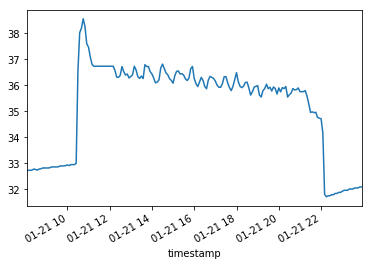

In [214]:
# 2019-01-21 00:00:00 to 08:00:00 is missing
day_completed_series1['2019-01-21'].plot()

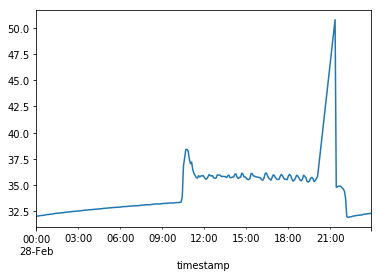

In [439]:
day_completed_series1['2019-02-28'].plot()

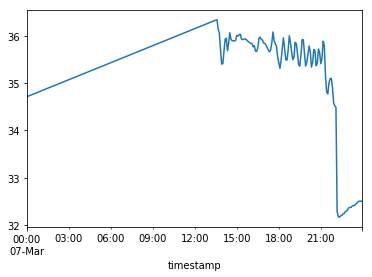

In [441]:
day_completed_series1['2019-03-07'].plot()

In [ ]:
[datetime.date(2019, 1, 14) datetime.date(2019, 1, 15)
 datetime.date(2019, 1, 16) datetime.date(2019, 1, 17)
 datetime.date(2019, 1, 18) datetime.date(2019, 1, 31)
 datetime.date(2019, 2, 19) datetime.date(2019, 2, 26)
 datetime.date(2019, 2, 27) datetime.date(2019, 3, 1)
 datetime.date(2019, 3, 8)]

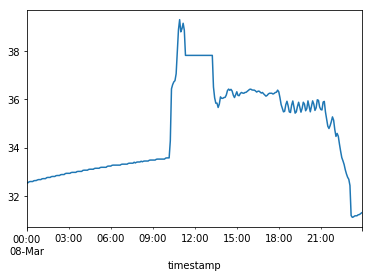

In [459]:
day_completed_series1['2019-03-08'].plot()

In [460]:
[datetime.date(2019, 1, 22) datetime.date(2019, 1, 25)
 datetime.date(2019, 1, 28) datetime.date(2019, 1, 29)
 datetime.date(2019, 1, 30) datetime.date(2019, 2, 13)
 datetime.date(2019, 2, 14) datetime.date(2019, 2, 15)
 datetime.date(2019, 2, 18) datetime.date(2019, 2, 20)
 datetime.date(2019, 2, 21) datetime.date(2019, 2, 22)
 datetime.date(2019, 3, 4) datetime.date(2019, 3, 5)
 datetime.date(2019, 3, 11) datetime.date(2019, 3, 12)]

SyntaxError: invalid syntax (<ipython-input-460-6644f3f80107>, line 1)

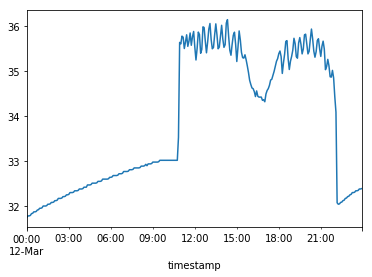

In [479]:
day_completed_series1['2019-03-12'].plot()

In [ ]:
[datetime.date(2019, 1, 19) datetime.date(2019, 1, 20)
 datetime.date(2019, 1, 27) datetime.date(2019, 2, 16)
 datetime.date(2019, 3, 2)]

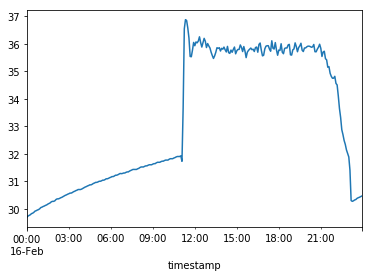

In [483]:
day_completed_series1['2019-02-16'].plot()

In [228]:
# 2019-01-23 mis one value 18:55:00 is missing
print(day_completed_series1['2019-01-23'].index.minute.value_counts())
print(day_completed_series1['2019-01-23'].index.hour.value_counts())

50    24
45    24
40    24
35    24
30    24
25    24
20    24
15    24
10    24
5     24
0     24
55    23
Name: timestamp, dtype: int64
23    12
22    12
1     12
2     12
3     12
4     12
5     12
6     12
7     12
8     12
9     12
10    12
11    12
12    12
13    12
14    12
15    12
16    12
17    12
19    12
20    12
21    12
0     12
18    11
Name: timestamp, dtype: int64


In [231]:
# 2019-02-17 03:40:00 is missing
print(day_completed_series1['2019-02-17'].index.minute.value_counts())
print(day_completed_series1['2019-02-17'].index.hour.value_counts())

55    24
50    24
45    24
35    24
30    24
25    24
20    24
15    24
10    24
5     24
0     24
40    23
Name: timestamp, dtype: int64
23    12
22    12
1     12
2     12
4     12
5     12
6     12
7     12
8     12
9     12
10    12
11    12
12    12
13    12
14    12
15    12
16    12
17    12
18    12
19    12
20    12
21    12
0     12
3     11
Name: timestamp, dtype: int64


In [236]:
# 2019-03-06 00:10:00 is missing
print(day_completed_series1['2019-03-06'].index.minute.value_counts())
print(day_completed_series1['2019-03-06'].index.hour.value_counts())

55    24
50    24
45    24
40    24
35    24
30    24
25    24
20    24
15    24
5     24
0     24
10    23
Name: timestamp, dtype: int64
23    12
22    12
1     12
2     12
3     12
4     12
5     12
6     12
7     12
8     12
9     12
10    12
11    12
12    12
13    12
14    12
15    12
16    12
17    12
18    12
19    12
20    12
21    12
0     11
Name: timestamp, dtype: int64


In [239]:
# 2019-03-06 03:25:00 is missing
print(day_completed_series1['2019-03-10'].index.minute.value_counts())
print(day_completed_series1['2019-03-10'].index.hour.value_counts())

55    24
50    24
45    24
40    24
35    24
30    24
20    24
15    24
10    24
5     24
0     24
25    23
Name: timestamp, dtype: int64
23    12
22    12
1     12
2     12
4     12
5     12
6     12
7     12
8     12
9     12
10    12
11    12
12    12
13    12
14    12
15    12
16    12
17    12
18    12
19    12
20    12
21    12
0     12
3     11
Name: timestamp, dtype: int64


### 1. A day is a period pattern of time series

In [19]:
series1.index

DatetimeIndex(['2019-01-13 00:00:00', '2019-01-13 00:05:00',
               '2019-01-13 00:10:00', '2019-01-13 00:15:00',
               '2019-01-13 00:20:00', '2019-01-13 00:25:00',
               '2019-01-13 00:30:00', '2019-01-13 00:35:00',
               '2019-01-13 00:40:00', '2019-01-13 00:45:00',
               ...
               '2019-03-15 11:35:00', '2019-03-15 11:40:00',
               '2019-03-15 11:45:00', '2019-03-15 11:50:00',
               '2019-03-15 11:55:00', '2019-03-15 12:00:00',
               '2019-03-15 12:05:00', '2019-03-15 12:10:00',
               '2019-03-15 12:15:00', '2019-03-15 12:20:00'],
              dtype='datetime64[ns]', name='timestamp', length=17615, freq=None)

Data starts from 2019-01-13 00:00:00 to 2019-03-15 12:20:00, but the last day (2019-03-15) is incompleted

In [20]:
day_completed_series1 = series1['2019-01-13':'2019-03-14']

### 2. Some typical profiles of days

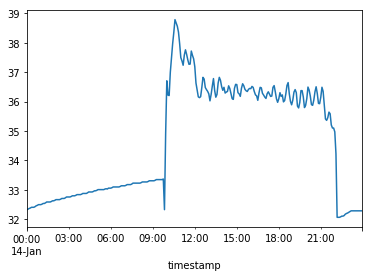

In [30]:
day_completed_series1['2019-01-14'].plot()

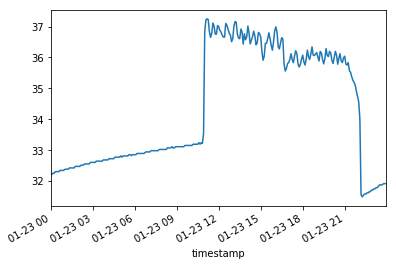

In [31]:
day_completed_series1['2019-01-23'].plot()

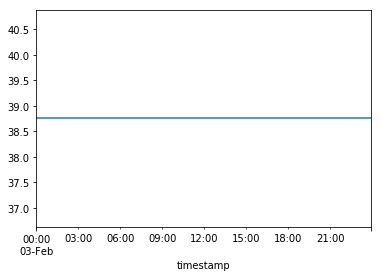

In [33]:
# this may be an outlier
day_completed_series1['2019-02-03'].plot()

### 3. Plot per slot time series

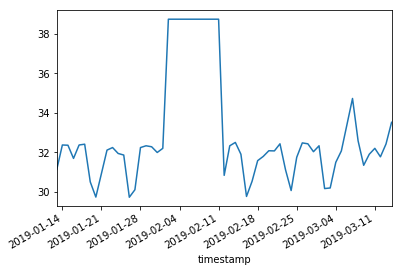

In [68]:
day_completed_series1[(day_completed_series1.index.hour==0) & (day_completed_series1.index.minute==10)].plot()

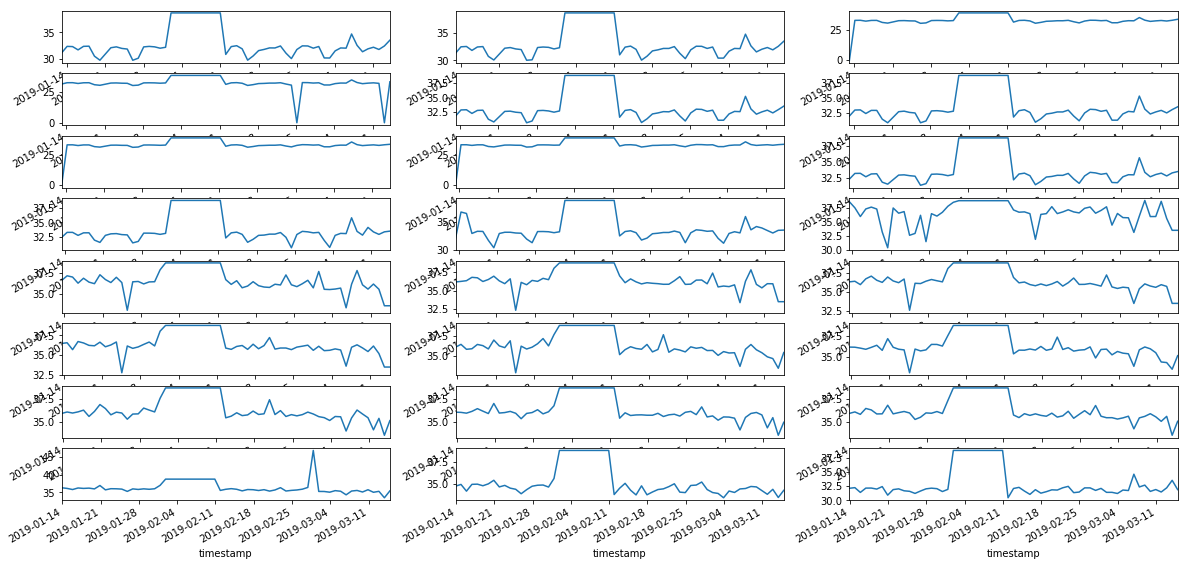

In [70]:
n_rows = 8
n_cols = 3
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols)
for i in range(24):
    day_completed_series1[(day_completed_series1.index.hour==i) & (day_completed_series1.index.minute==0)].plot(
        ax=axes[i//n_cols, i%n_cols], figsize=[20,10])

### 4. Clustering daily profiles

### 4.1 Prepare daily profile dataset

In [389]:
X = list()
selected_date = list()
for date in np.unique(day_completed_series1.index.date):
    x = day_completed_series1[day_completed_series1.index.date==date].to_list()
    if (len(x)== 12*24):
        print(date)
        selected_date.append(date)
        X.append(x)

2019-01-13
2019-01-14
2019-01-15
2019-01-16
2019-01-17
2019-01-18
2019-01-19
2019-01-20
2019-01-22
2019-01-24
2019-01-25
2019-01-26
2019-01-27
2019-01-28
2019-01-29
2019-01-30
2019-01-31
2019-02-01
2019-02-02
2019-02-03
2019-02-04
2019-02-05
2019-02-06
2019-02-07
2019-02-08
2019-02-09
2019-02-10
2019-02-11
2019-02-12
2019-02-13
2019-02-14
2019-02-15
2019-02-16
2019-02-18
2019-02-19
2019-02-20
2019-02-21
2019-02-22
2019-02-23
2019-02-24
2019-02-25
2019-02-26
2019-02-27
2019-02-28
2019-03-01
2019-03-02
2019-03-03
2019-03-04
2019-03-05
2019-03-07
2019-03-08
2019-03-09
2019-03-11
2019-03-12
2019-03-13
2019-03-14


### Select the best number of clusters

In [431]:
def eval_clustering(X, clustering):
    # intra-cluster distance
    in_cluster_dist = 0.0
    in_cluster_count = 0
    clusters = np.unique(clustering.labels_)
    for i in np.nditer(clusters):
        a = X[clustering.labels_==i]
        if (len(a)>1):
            b = a.reshape(a.shape[0], 1, a.shape[1])
            m = np.sqrt(np.einsum('ijk, ijk->ij', a-b, a-b))
            in_cluster_dist += np.sum(m)/(len(a)*(len(a)-1))
            in_cluster_count += 1
            
    # inter-cluster distance
    c = list()
    for i in np.nditer(clusters):
        a = X[clustering.labels_==i]
        centre = np.mean(a, axis=0)
        c.append(centre)
    c = np.vstack(c)
    d = c.reshape(c.shape[0], 1, c.shape[1])
    m = np.sqrt(np.einsum('ijk, ijk->ij', c-d, c-d))
    bt_cluster_dist = np.sum(m)/(len(c)*(len(c)-1))
            
    return in_cluster_dist/in_cluster_count, bt_cluster_dist

In [440]:
from sklearn.cluster import AgglomerativeClustering

min_score = float('inf')
for n in range(2, 20):
    clustering = AgglomerativeClustering(n_clusters=n).fit(X)
    XX = np.array(X)
    in_dist, bt_dist = eval_clustering(XX, clustering)
    if (in_dist/bt_dist)<min_score:
        min_score = (in_dist/bt_dist)
        best_n = n
    print(in_dist, bt_dist, in_dist/bt_dist)
    
print(best_n)

21.613382234717225 85.10380858808985 0.25396492346574
18.65077156238524 152.1266437770919 0.12260029603830502
36.37074465801856 144.2021927042894 0.2522204688842896
15.346912416895425 138.7435276451446 0.11061353763576802
15.455508098405232 123.06799384986465 0.12558511449581275
14.821701587967402 114.38100456988671 0.12958184485004548
11.954040793858647 113.45680528905383 0.1053620429678356
12.51934654715902 104.77204784791275 0.1194912842147757
11.669634769345539 99.62188283358901 0.11713927138717907
12.871257789213306 94.5003513792726 0.13620327968469803
12.29481569687752 90.04238765431107 0.13654475427816876
12.090108009206746 86.03098292221132 0.14053202228479184
11.527139869655318 82.14381048180724 0.14032876977637027
11.34474661501942 78.67020108892316 0.14420640163606713
10.960109523731813 76.3519321693022 0.1435472451362324
10.739939623065837 73.18280642777742 0.14675495717241807
9.306722330727112 71.42999210778034 0.13029152119580592
8.961048616275203 69.14558120277195 0.1295

In [446]:
# Get the final clustering with best number of clusters
best_n = 14
clustering = AgglomerativeClustering(n_clusters=best_n).fit(X)

In [447]:
clustering.labels_

array([11,  0,  0,  0,  0,  0,  2,  2,  1,  4,  1,  6,  2,  1,  1,  1,  0,
       13,  3,  3,  3,  3,  3,  3,  3,  3,  3,  7,  5,  1,  1,  1,  2,  1,
        0,  1,  1,  1,  5,  6,  9,  0,  0, 10,  0,  2,  6,  1,  1, 12,  0,
        5,  1,  1,  8,  4])

### Draw the prototype of daily profiles of each cluster

[datetime.date(2019, 1, 14) datetime.date(2019, 1, 15)
 datetime.date(2019, 1, 16) datetime.date(2019, 1, 17)
 datetime.date(2019, 1, 18) datetime.date(2019, 1, 31)
 datetime.date(2019, 2, 19) datetime.date(2019, 2, 26)
 datetime.date(2019, 2, 27) datetime.date(2019, 3, 1)
 datetime.date(2019, 3, 8)]
[datetime.date(2019, 1, 22) datetime.date(2019, 1, 25)
 datetime.date(2019, 1, 28) datetime.date(2019, 1, 29)
 datetime.date(2019, 1, 30) datetime.date(2019, 2, 13)
 datetime.date(2019, 2, 14) datetime.date(2019, 2, 15)
 datetime.date(2019, 2, 18) datetime.date(2019, 2, 20)
 datetime.date(2019, 2, 21) datetime.date(2019, 2, 22)
 datetime.date(2019, 3, 4) datetime.date(2019, 3, 5)
 datetime.date(2019, 3, 11) datetime.date(2019, 3, 12)]
[datetime.date(2019, 1, 19) datetime.date(2019, 1, 20)
 datetime.date(2019, 1, 27) datetime.date(2019, 2, 16)
 datetime.date(2019, 3, 2)]
[datetime.date(2019, 2, 2) datetime.date(2019, 2, 3)
 datetime.date(2019, 2, 4) datetime.date(2019, 2, 5)
 datetime.date(

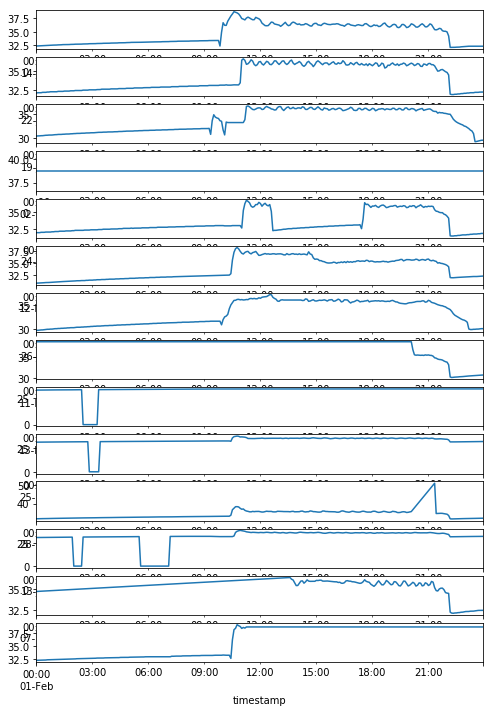

In [448]:
from datetime import date

fig, axes = plt.subplots(nrows=best_n, ncols=1)
selected_date = np.array(selected_date)
clusters = np.unique(clustering.labels_)
for i in np.nditer(clusters):
    cluster_dates = selected_date[clustering.labels_==i]
    print(cluster_dates)
    d = cluster_dates[0]
    day_completed_series1[day_completed_series1.index.date==d].plot(ax=axes[i], figsize=[8,12])

## Analyze the CWRT (Chilled Water Return Temperature)

In [52]:
data.shape

(17719, 2)

In [61]:
from statsmodels.tsa.seasonal import seasonal_decompose
s=seasonal_decompose(data['CWRT_syth'].dropna(), freq=12*24)

/Users/yiqun/anaconda3/lib/python3.7/site-packages/mkl_fft/_numpy_fft.py:1044: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  output = mkl_fft.rfftn_numpy(a, s, axes)


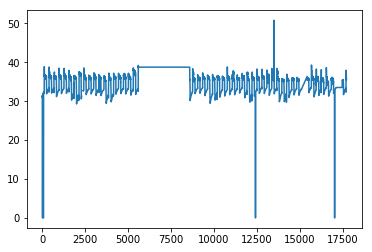

In [35]:
data['CWRT_syth'].plot()

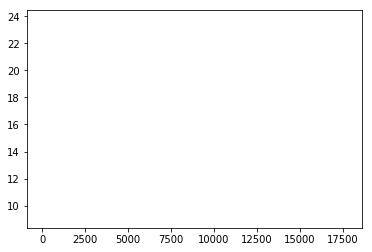